In [2]:
import pandas as pd
import numpy as np
import lifelines as ll
import mygene
from matplotlib import pyplot as plt

In [3]:
genedata = pd.read_csv('epitope_han/MatchedProteins.tsv',sep='\t',names=['viral twin','uniprot','identiy','length','mismatch','gap','qstart','qend','sstart','send','E','bit'])
genedata

,viral twin,uniprot,identiy,length,mismatch,gap,qstart,qend,sstart,send,E,bit
0,HLA-A0101_WSN_PA,Q16650,87.500,8,1,0,1,8,609,616,6.4,20.8
1,HLA-A0101_WSN_PA,Q9NYP3,87.500,8,1,0,1,8,187,194,5.6,20.8
2,HLA-A0101_WSN_PB2,P50747,88.889,9,1,0,1,9,247,255,1.6,22.3
3,HLA-A0203_WSN_PA,Q16798,77.778,9,2,0,1,9,374,382,7.6,20.4
4,HLA-A0206_WSN_PA,Q96HP0,77.778,9,2,0,1,9,1694,1702,8.4,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...
99,HLA-B5401_WSN_PA,Q96HP0,77.778,9,2,0,1,9,1694,1702,8.4,20.4
100,HLA-B5701_WSN_HA,O43246,77.778,9,2,0,1,9,191,199,6.7,20.8
101,HLA-B5701_WSN_PB2,P50747,77.778,9,2,0,1,9,246,254,7.4,20.4
102,HLA-B5801_WSN_HA,O43246,87.500,8,1,0,2,9,191,198,8.9,20.4


In [4]:
mg = mygene.MyGeneInfo()
genelist = list(genedata['uniprot'])
idlist = mg.querymany(genelist, scopes='uniprot',species='human',fields='geneid')
refdict = {}
for record in idlist:
    if 'notfound' in record: continue
    refdict[record['query']] = record['_id']

querying 1-104...done.
Finished.
22 input query terms found dup hits:
	[('Q16650', 4), ('Q9NYP3', 4), ('P50747', 5), ('Q16798', 11), ('Q96HP0', 3), ('Q9BY12', 4), ('P09923
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [17]:
cldata = pd.read_csv('GDC/luad_tcga_pan_can_atlas_2018/data_clinical_patient.txt',sep='\t',header=[4])
cldata

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
0,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70.0,Male,STAGE IV,6TH,0.0,-25752.0,...,Indivumed,Yes,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,NaN,NaN,0:CENSORED,0.000000
1,TCGA-05-4249,LUAD,LUAD,4addf05f-3668-4b3f-a17f-c0227329ca52,67.0,Male,STAGE IB,6TH,1523.0,-24532.0,...,Indivumed,Yes,0:LIVING,50.070684,0:ALIVE OR DEAD TUMOR FREE,50.070684,NaN,NaN,0:CENSORED,50.070684
2,TCGA-05-4250,LUAD,LUAD,f98ecd8a-b878-4f53-b911-20cd8e17281c,79.0,Female,STAGE IIIA,6TH,NaN,-29068.0,...,Indivumed,Yes,1:DECEASED,3.978039,NaN,3.978039,NaN,NaN,0:CENSORED,3.978039
3,TCGA-05-4382,LUAD,LUAD,3434b91a-c05f-460f-a078-7b1bb6e7085d,68.0,Male,STAGE IB,6TH,607.0,-24868.0,...,Indivumed,Yes,0:LIVING,19.955946,0:ALIVE OR DEAD TUMOR FREE,19.955946,1:Recurred/Progressed,10.980702,1:PROGRESSION,10.980702
4,TCGA-05-4384,LUAD,LUAD,9a50e7e4-831d-489f-87d2-979e987561cc,66.0,Male,STAGE IIIA,6TH,426.0,-24411.0,...,Indivumed,Yes,0:LIVING,14.005326,0:ALIVE OR DEAD TUMOR FREE,14.005326,NaN,NaN,1:PROGRESSION,6.016372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,TCGA-17-Z045,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Washington University,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,TCGA-17-Z031,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Washington University,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,TCGA-17-Z049,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Washington University,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,TCGA-17-Z060,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Washington University,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
expdata = pd.read_csv('GDC/luad_tcga_pan_can_atlas_2018/data_RNA_Seq_v2_expression_median.txt',sep='\t')
expdata

,Hugo_Symbol,Entrez_Gene_Id,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
2,NaN,100134869,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
3,NaN,10357,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1810,57.0596,...,163.5740,130.7490,101.7400,82.4231,100.4200,100.1870,74.7210,85.3715,61.1388,76.9265
4,NaN,10431,848.9400,924.0160,1140.6800,807.1730,562.0040,1342.6200,1148.3300,955.9140,...,919.1690,403.4910,918.9530,995.6060,536.7600,873.9790,766.7450,677.7330,1137.3200,565.4330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,0.6981,20.2833,26.5274,64.8514,7.9414,71.8121,7.6641,14.2273,...,15.0115,27.5260,1.2703,73.4463,3.4968,17.5029,52.6221,10.0744,0.4785,6.5520
20527,ZYG11B,79699,1088.0500,787.5060,475.1720,908.1590,778.8640,534.8990,618.2340,264.4130,...,666.2820,825.7800,758.6380,729.4410,675.7580,726.3710,757.8540,531.6540,782.2970,623.0910
20528,ZYX,7791,2837.9400,2351.2500,5437.4500,6770.1500,3341.4800,2565.4400,5256.2700,4949.2200,...,3745.9600,4719.0300,4019.0500,4187.0700,4305.4500,4185.5300,3077.7900,1995.1900,4483.2500,5346.3900
20529,ZZEF1,23140,871.2800,1138.1200,1170.5200,1169.2400,1737.3200,679.1950,780.4570,467.3540,...,641.4550,936.5560,906.5040,1325.8000,1591.9200,1333.7200,1989.3100,1424.1600,1520.5700,1582.9500


In [19]:
def find_expression(x,gene):
    #print(x)
    if gene not in refdict:
        return 'NA'
    if x+'-01' not in expdata:
        return 'NA'
    geneid = refdict[gene]
    try:
        geneid = int(geneid)
    except:
        return 'NA'
    return sum(expdata[x+'-01'][expdata['Entrez_Gene_Id']==geneid])
    
for gene in list(genedata['uniprot']):
    cldata[gene] = cldata['PATIENT_ID'].apply(lambda x:find_expression(x,gene))
cldata

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,Q7Z407,Q1EHB4,P0DJG4,Q92859,Q9UK61,Q8IY22,Q8TEW0,Q9UBR2,Q9NPR2,Q9BZJ6
0,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70.0,Male,STAGE IV,6TH,0.0,-25752.0,...,0.0,0.3491,0,923.99,1598.85,827.297,2450.48,6386.6,6117.46,0.6981
1,TCGA-05-4249,LUAD,LUAD,4addf05f-3668-4b3f-a17f-c0227329ca52,67.0,Male,STAGE IB,6TH,1523.0,-24532.0,...,0.0,32.1957,0,2008.37,990.667,2613.97,962.651,4906.3,4383.12,4.5074
2,TCGA-05-4250,LUAD,LUAD,f98ecd8a-b878-4f53-b911-20cd8e17281c,79.0,Female,STAGE IIIA,6TH,NaN,-29068.0,...,2.9843,0.0,0,954.323,1466.64,2569.18,1648.01,8091.19,11910.1,12.9321
3,TCGA-05-4382,LUAD,LUAD,3434b91a-c05f-460f-a078-7b1bb6e7085d,68.0,Male,STAGE IB,6TH,607.0,-24868.0,...,0.0,188.572,0,1885.72,1300.78,1823.74,1699.06,14723.9,5229.03,12.4438
4,TCGA-05-4384,LUAD,LUAD,9a50e7e4-831d-489f-87d2-979e987561cc,66.0,Male,STAGE IIIA,6TH,426.0,-24411.0,...,2.4435,3.6652,0,1269.4,1925.77,2403.79,1138.67,6812.46,4079.41,7.9414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,TCGA-17-Z045,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
562,TCGA-17-Z031,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
563,TCGA-17-Z049,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
564,TCGA-17-Z060,NaN,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [20]:
cldata.to_csv('GDC/luad_tcga_pan_can_atlas_2018/expression_annotated_survival_flu_HLA_genes.tsv',sep='\t')

## KM plot

In [21]:
def find_status(x):
    try:
        return float(str(x)[0])
    except:
        return 'NA'
    
cldata['status'] = cldata['OS_STATUS'].apply(lambda x:find_status(x))

In [22]:
def find_group(x):
    if x>median:
        return 'high'
    return 'low'

#gene = 'Q9BZJ6'
#cldata[gene] = cldata[gene].replace('NA',np.nan)
#median = np.nanmedian(cldata[gene])
#cldata[gene+'status'] = cldata[gene].apply(lambda x:find_group(x))

In [11]:
df = pd.DataFrame(list(zip(cldata['OS_MONTHS'], cldata['status'],cldata[gene+'status'])), 
               columns =['survival','state','group']) 
#filter NA data
alldata = df[df['state']!='NA']
alldata = alldata.dropna()
lowdata = alldata[alldata['group']=='low']
highdata = alldata[alldata['group']=='high']

/home/Tianhao/Tools/anaconda3/envs/survival/lib/python3.9/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/Tianhao/Tools/anaconda3/envs/survival/lib/python3.9/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


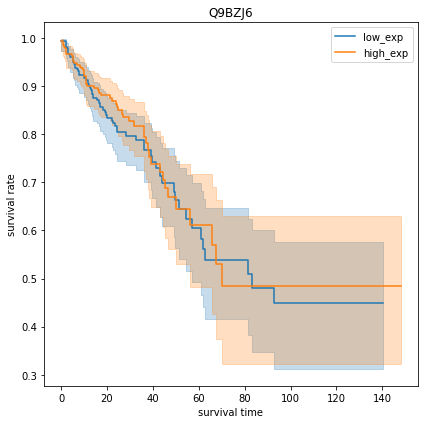

In [12]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
kmf = ll.KaplanMeierFitter()
kmf.fit(lowdata['survival'], event_observed=lowdata['state'],label='low_exp') 
ax = kmf.plot()
kmf.fit(highdata['survival'], event_observed=highdata['state'],label='high_exp') 
ax = kmf.plot(ax=ax)
#ax.set_xlim(0,4000)
#ax.set_ylim(0.3,1)
ax.set_ylabel('survival rate')
ax.set_xlabel('survival time')
ax.set_title(gene)
plt.tight_layout()
plt.savefig('expression_survival/KMplot_'+gene+'.png',dpi=600)

In [13]:
results = ll.statistics.logrank_test(lowdata['survival'], highdata['survival'], lowdata['state'], highdata['state'], alpha=.99)
pvalue = results.summary['p']

/home/Tianhao/Tools/anaconda3/envs/survival/lib/python3.9/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/Tianhao/Tools/anaconda3/envs/survival/lib/python3.9/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/Tianhao/Tools/anaconda3/envs/survival/lib/python3.9/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  

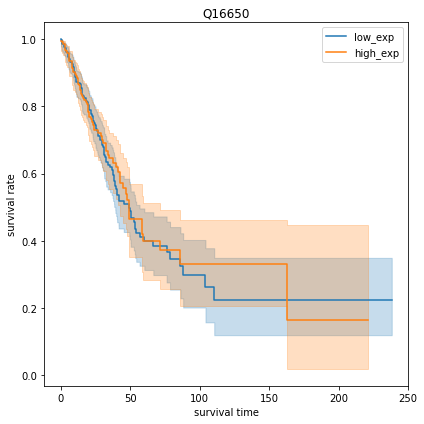

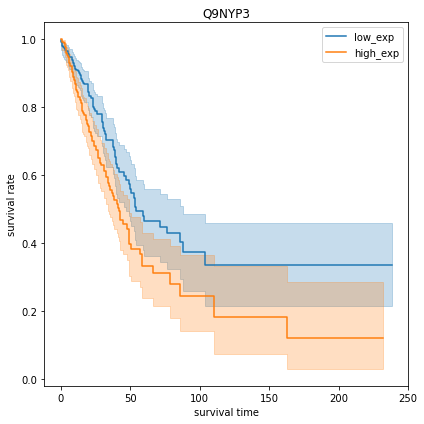

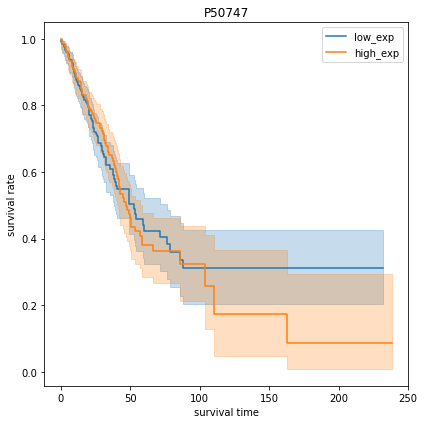

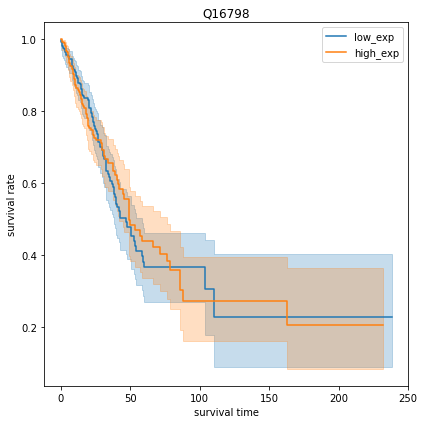

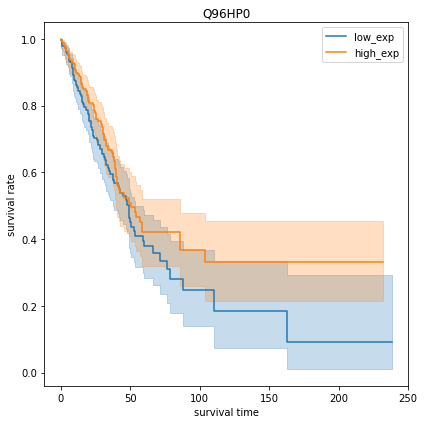

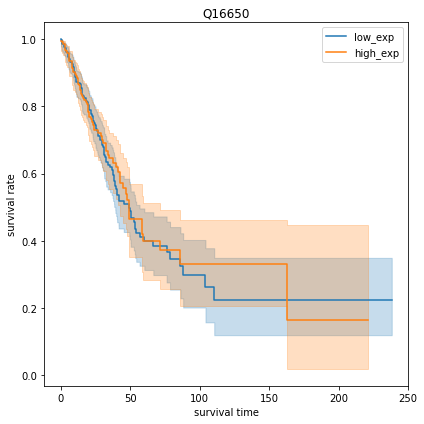

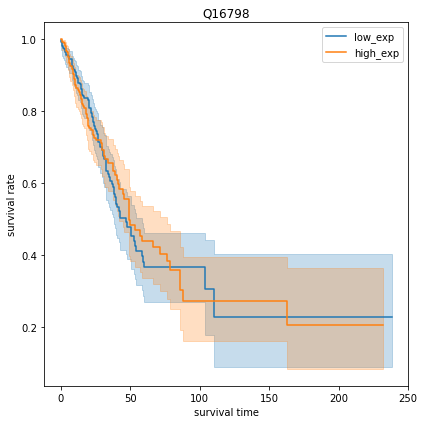

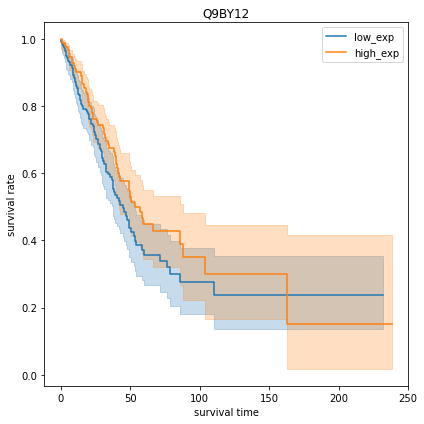

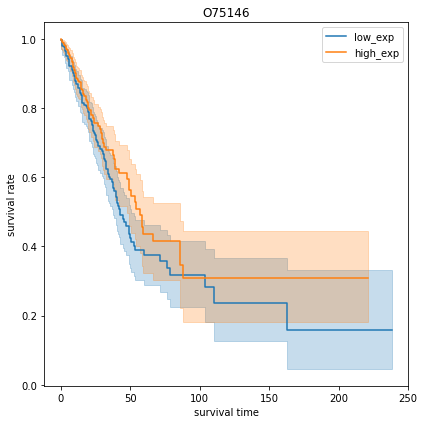

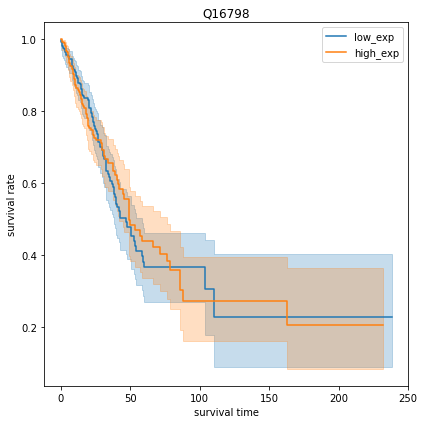

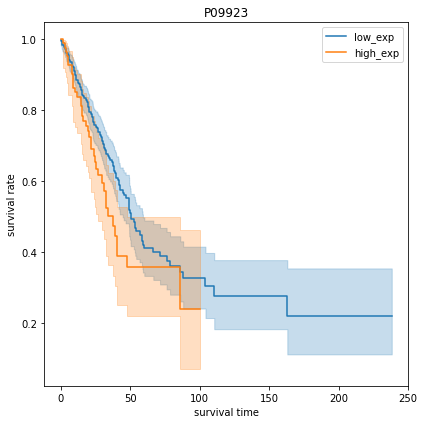

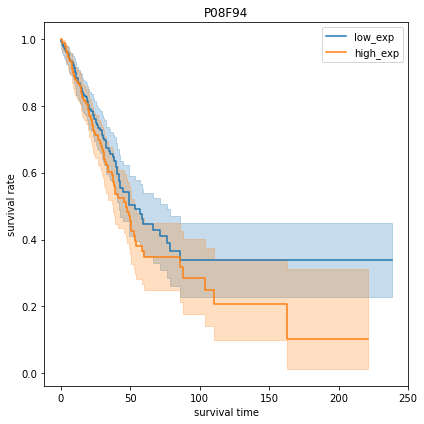

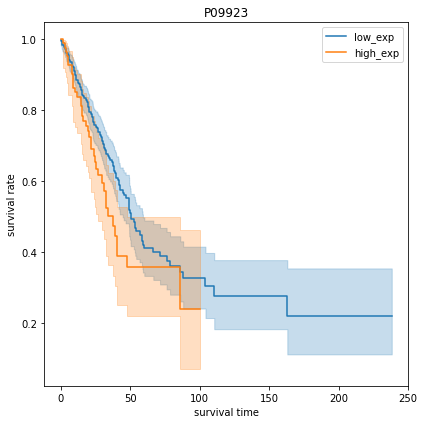

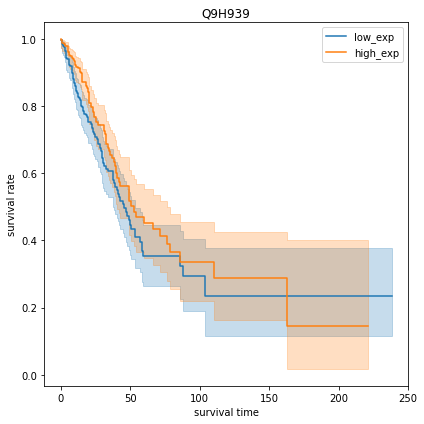

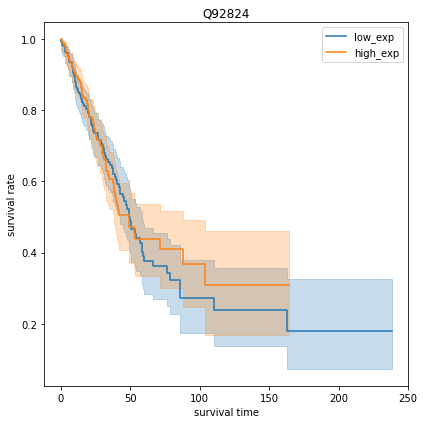

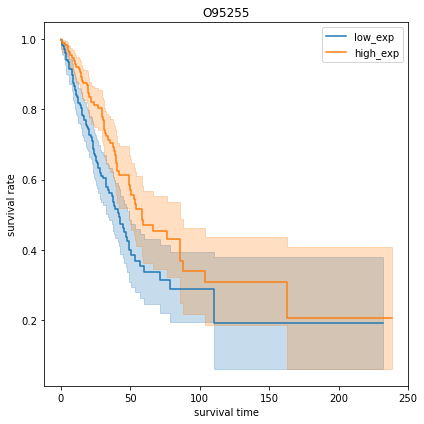

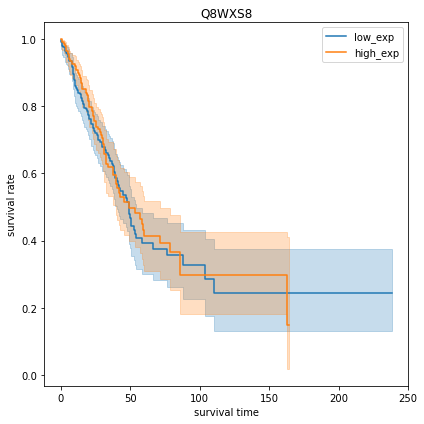

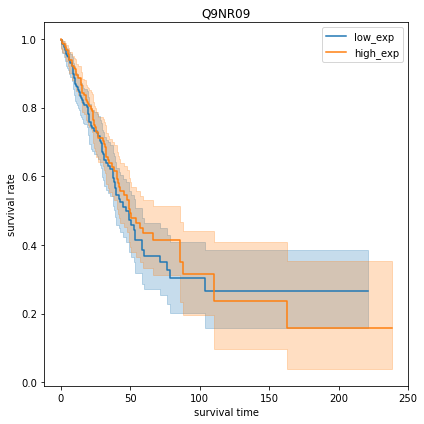

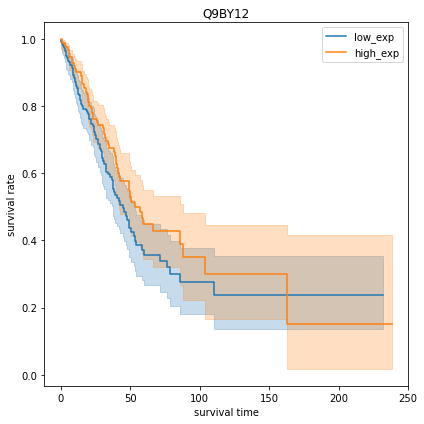

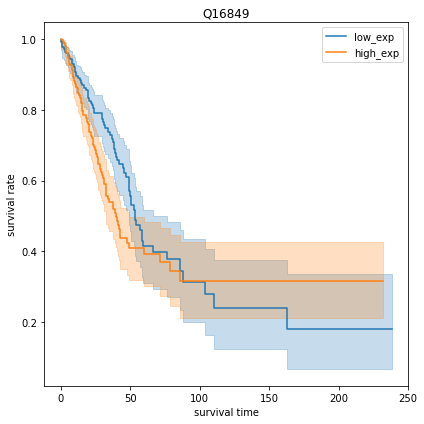

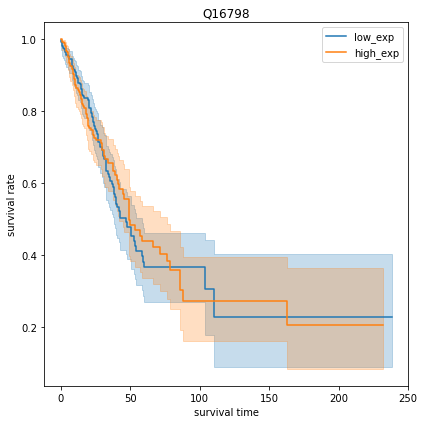

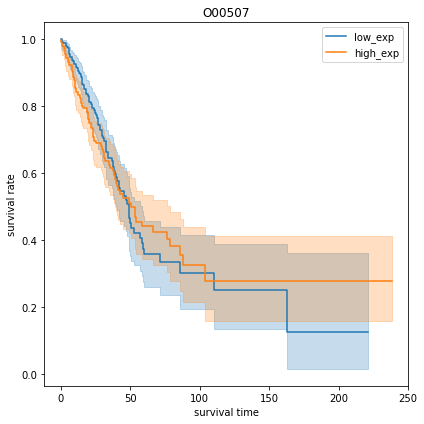

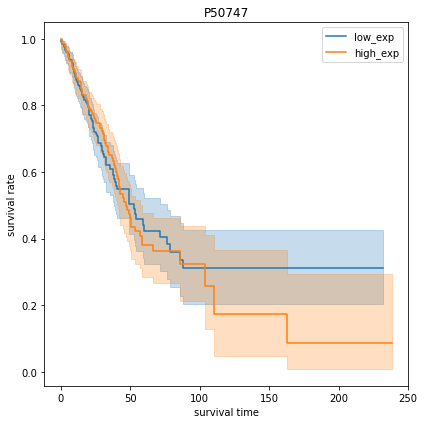

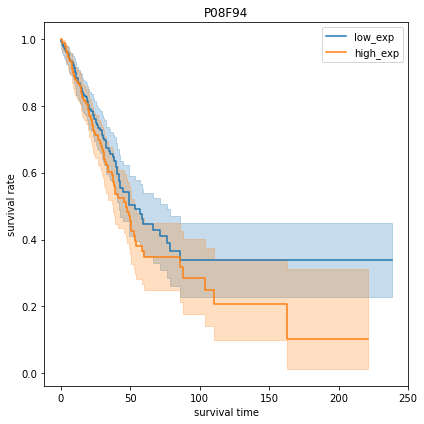

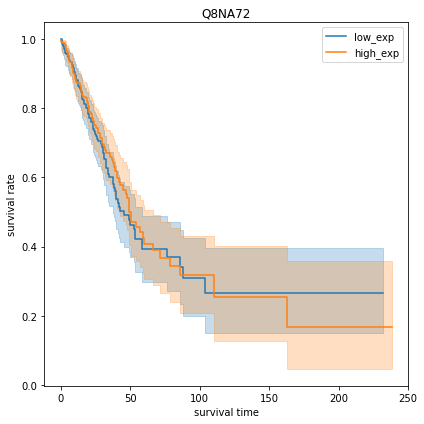

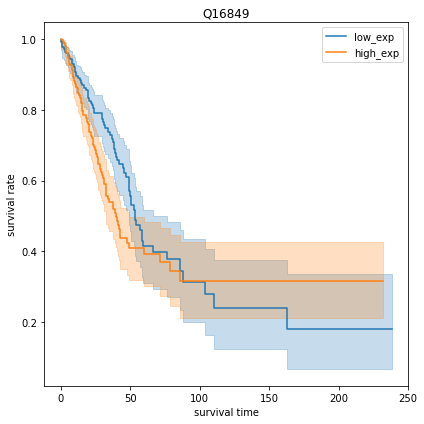

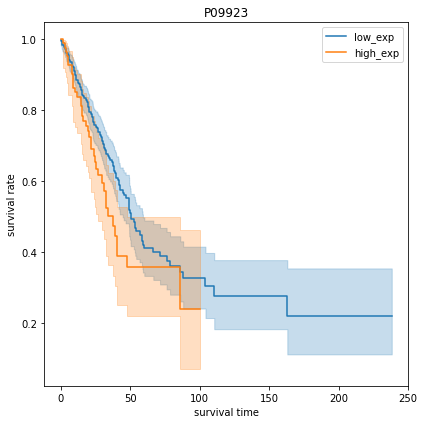

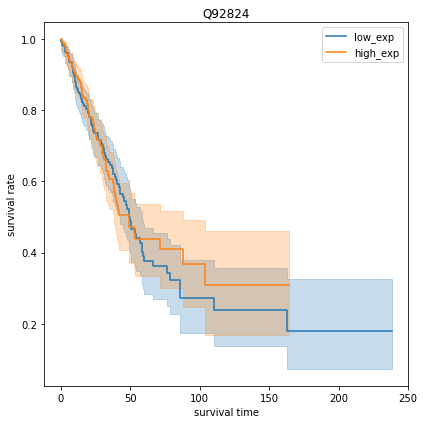

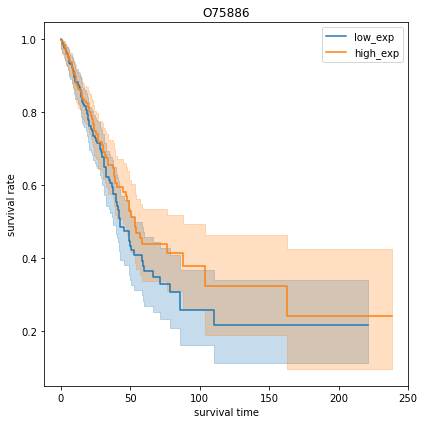

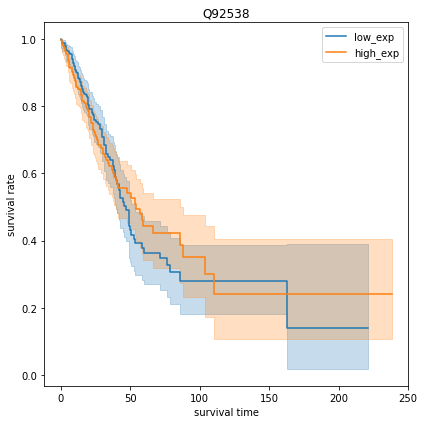

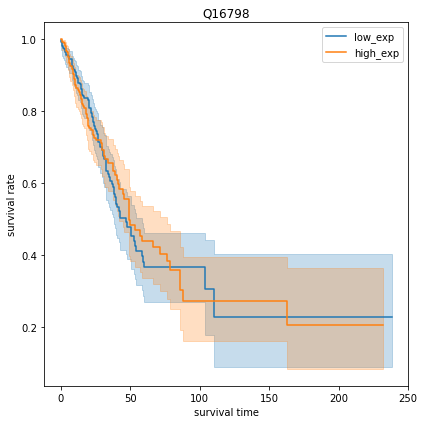

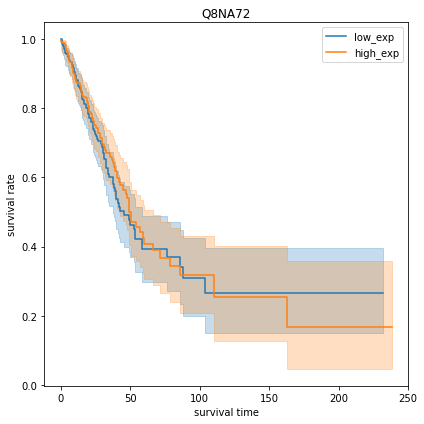

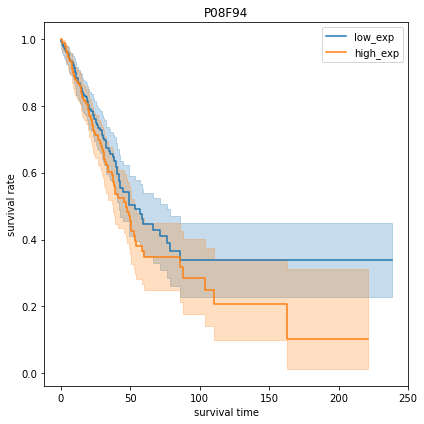

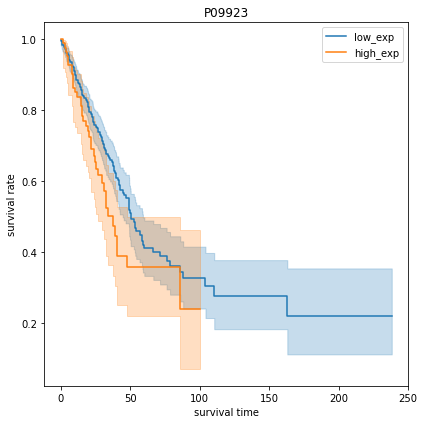

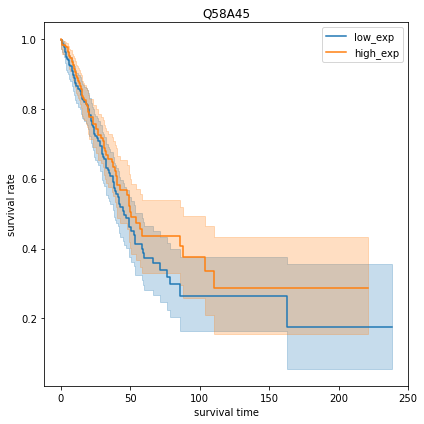

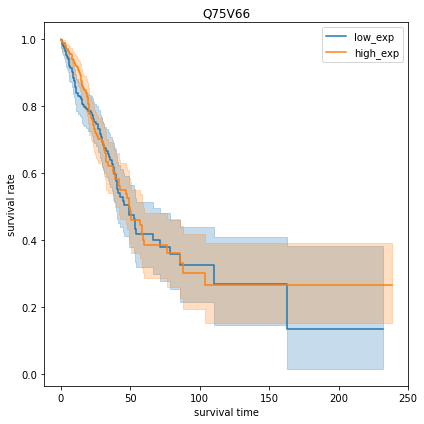

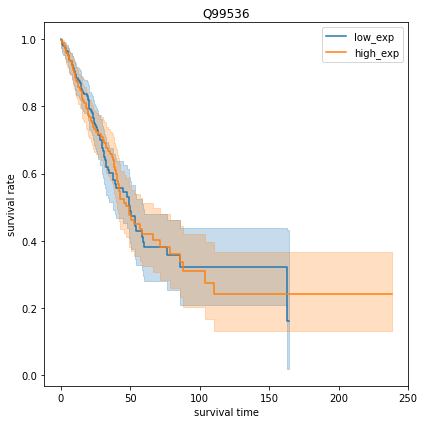

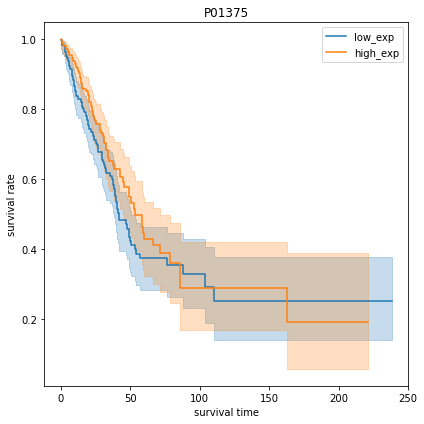

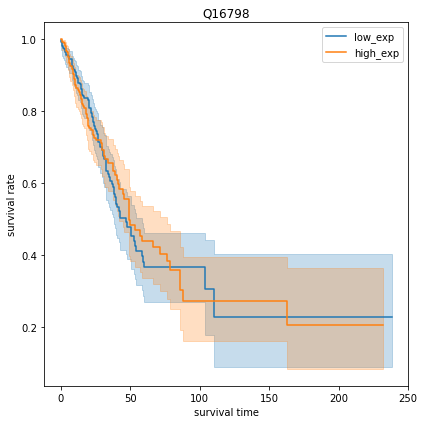

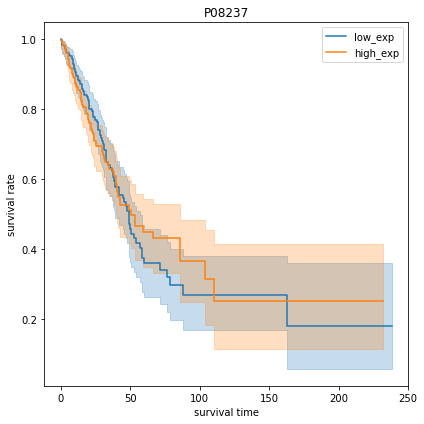

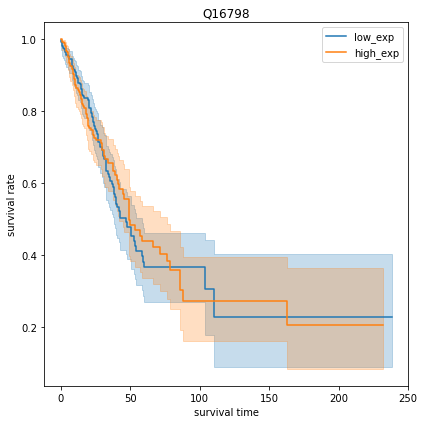

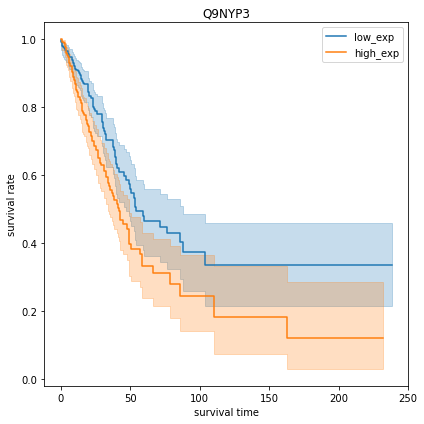

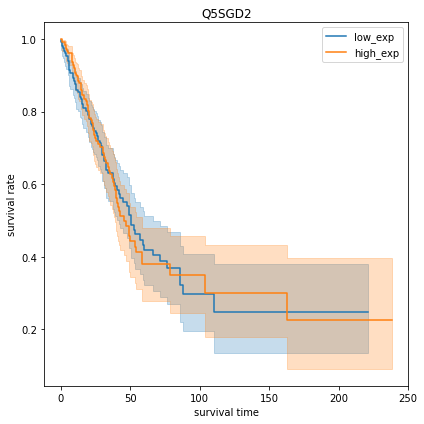

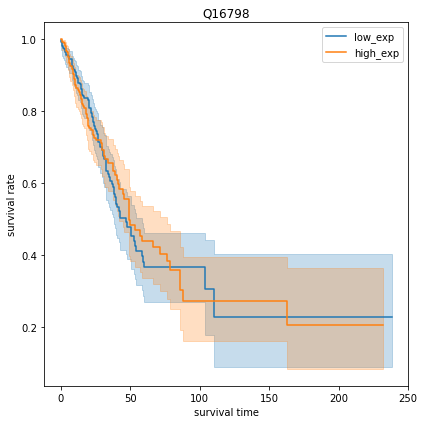

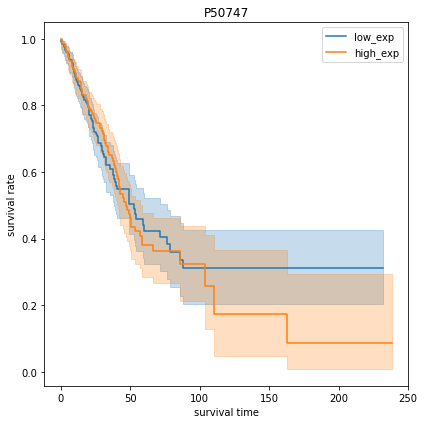

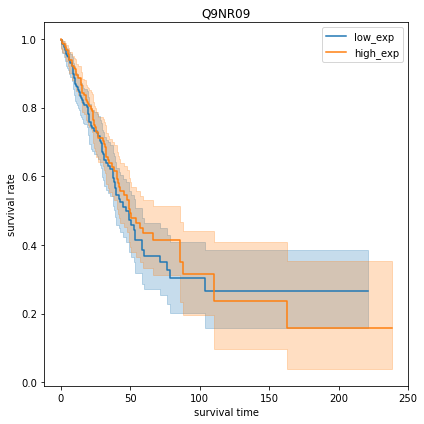

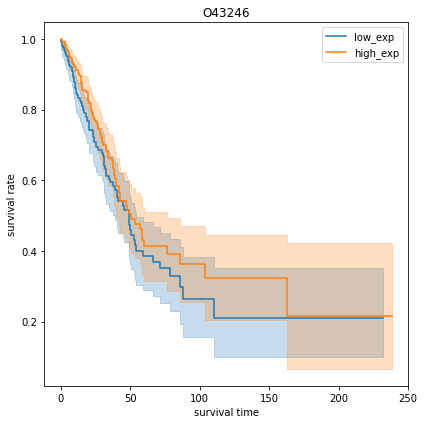

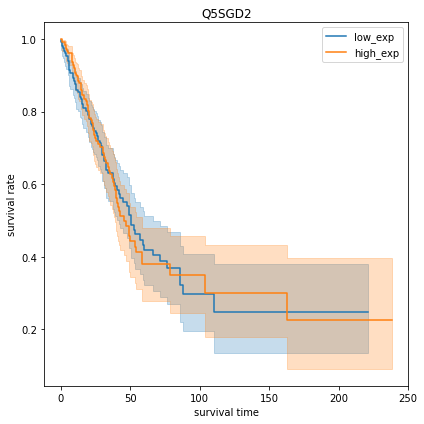

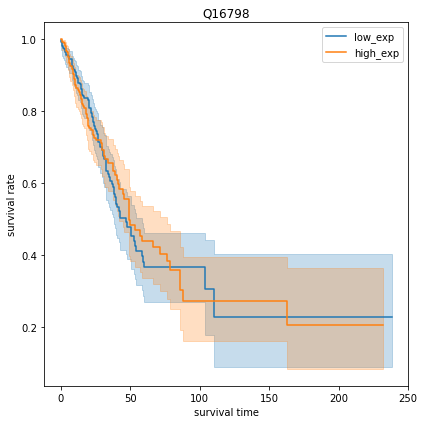

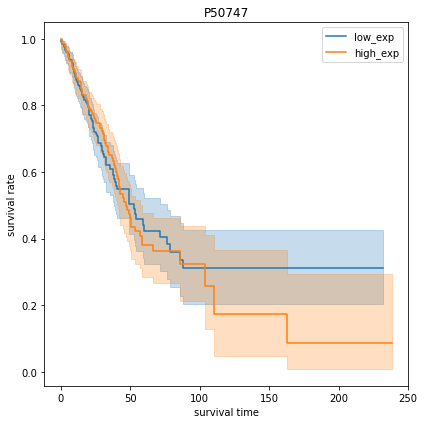

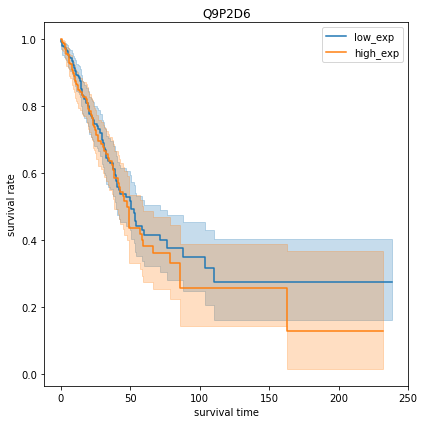

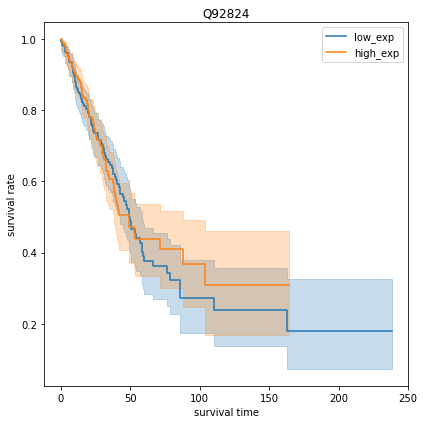

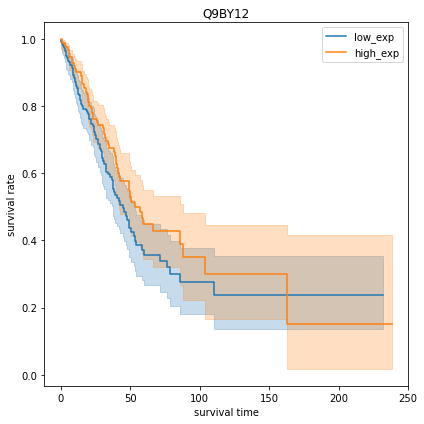

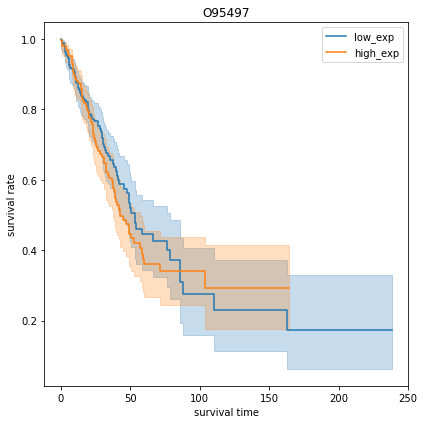

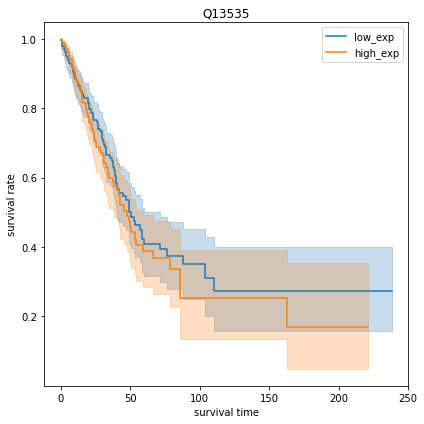

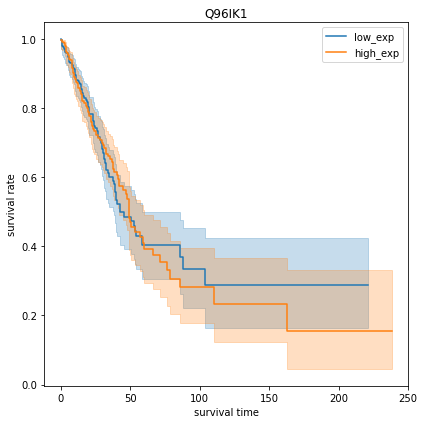

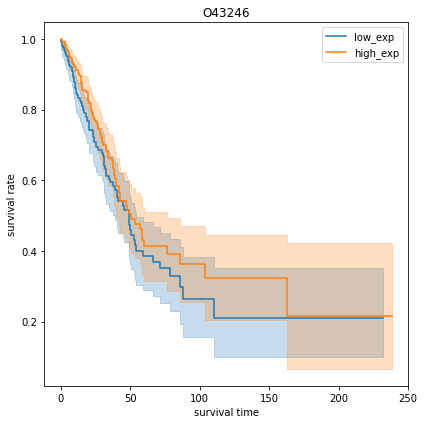

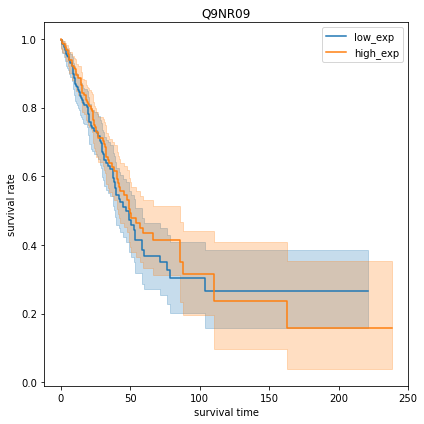

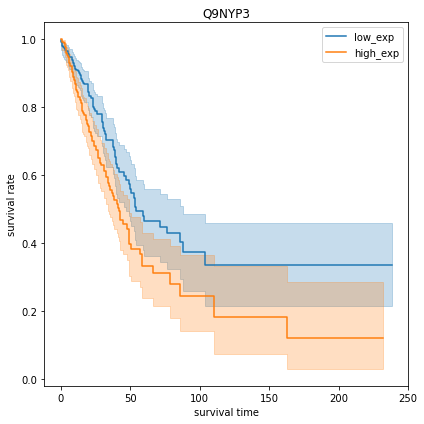

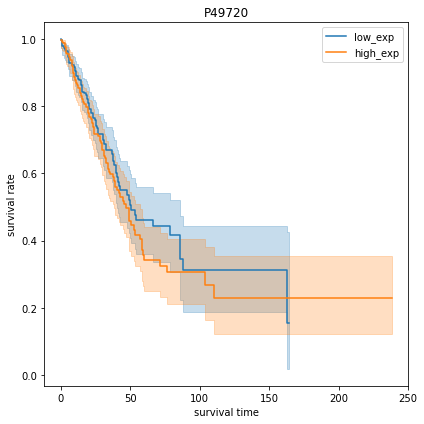

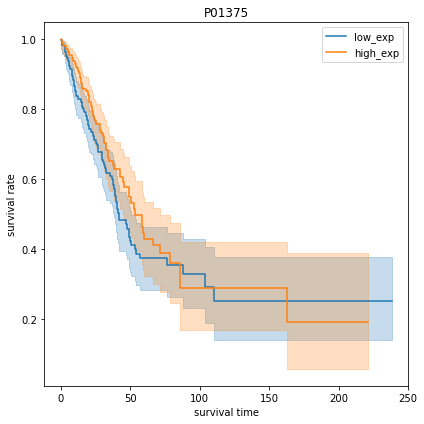

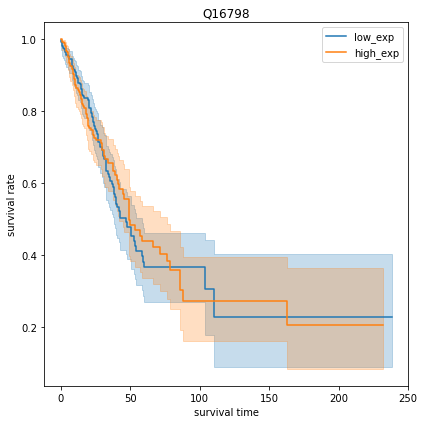

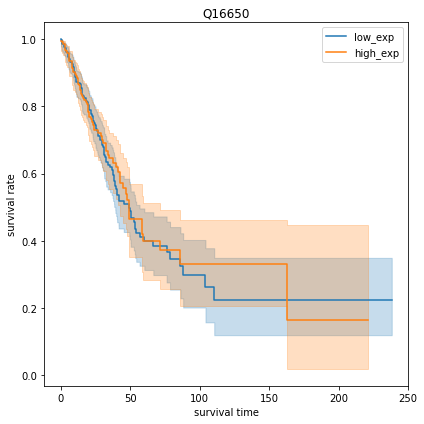

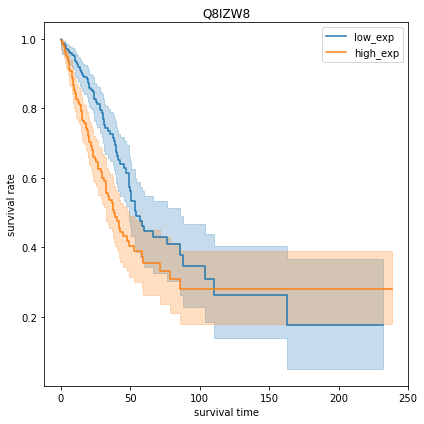

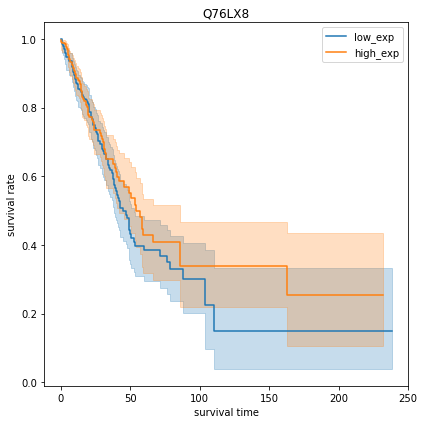

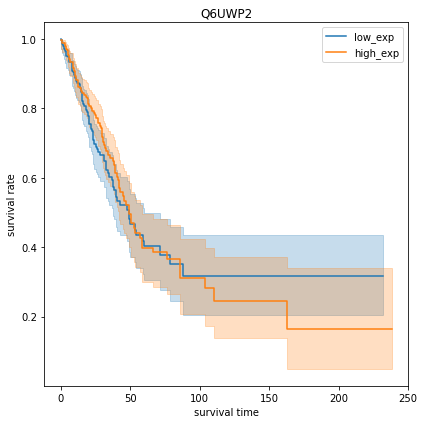

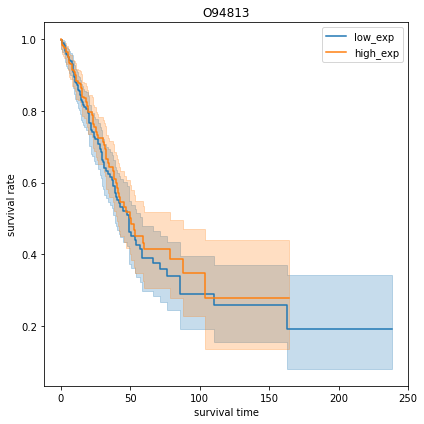

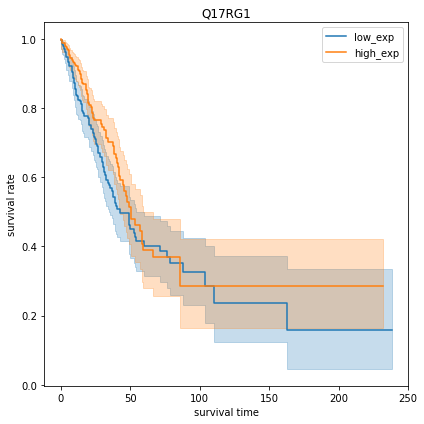

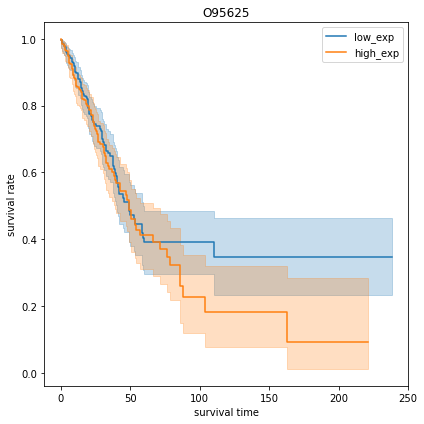

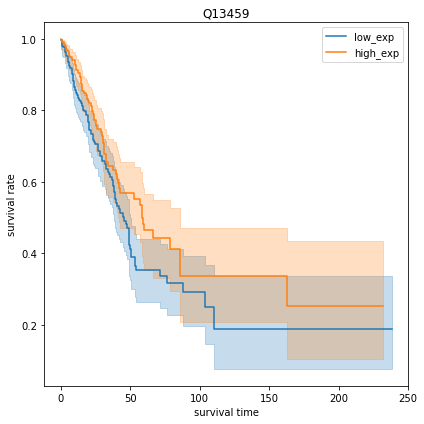

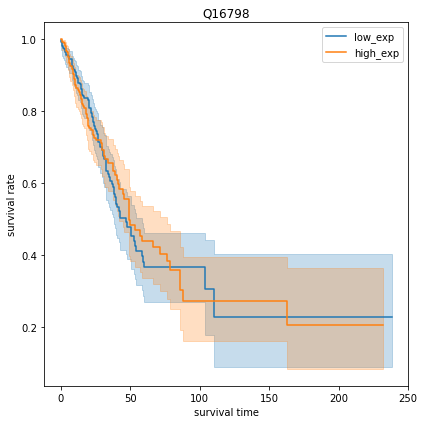

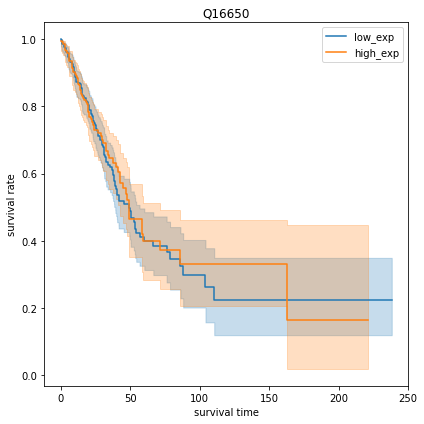

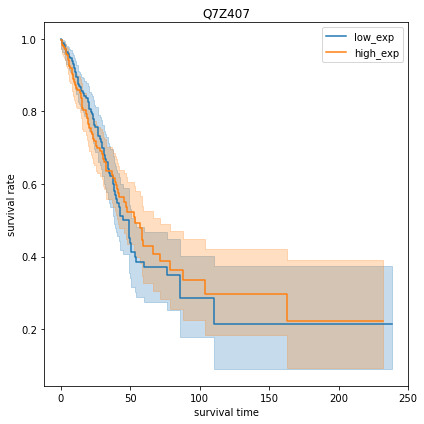

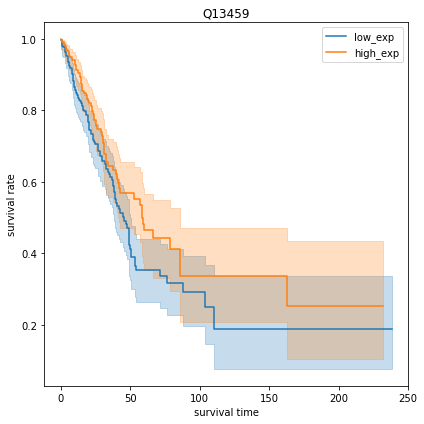

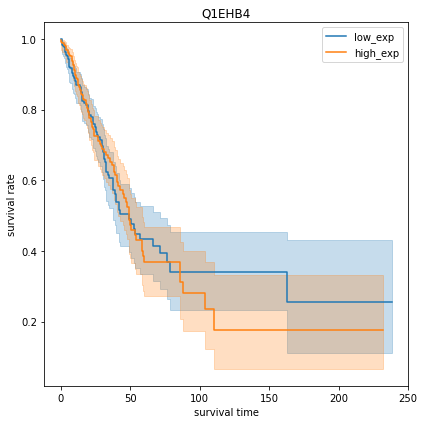

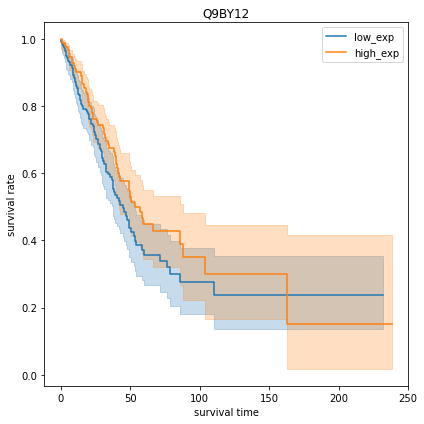

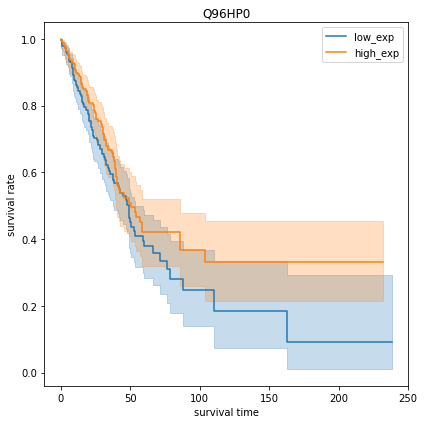

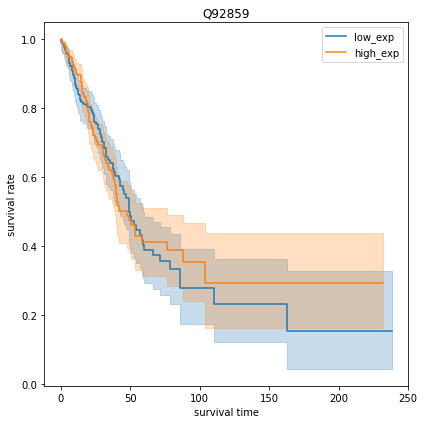

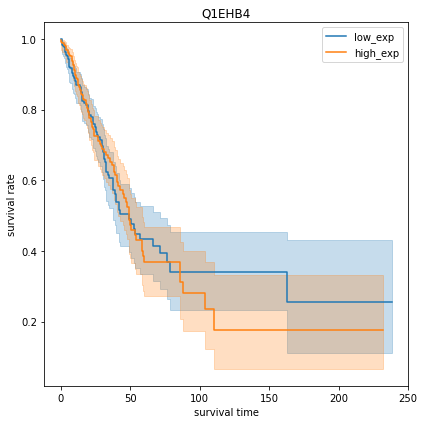

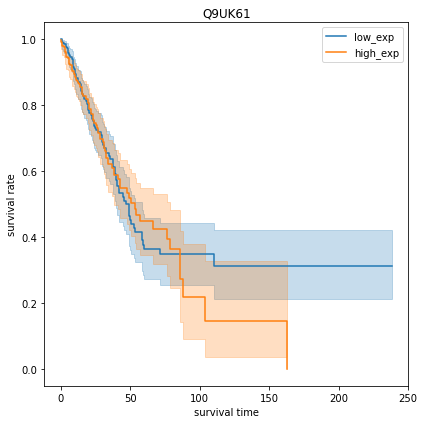

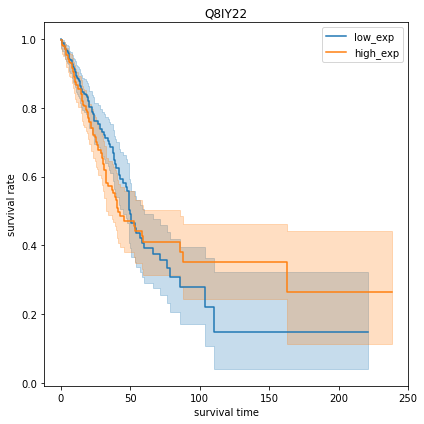

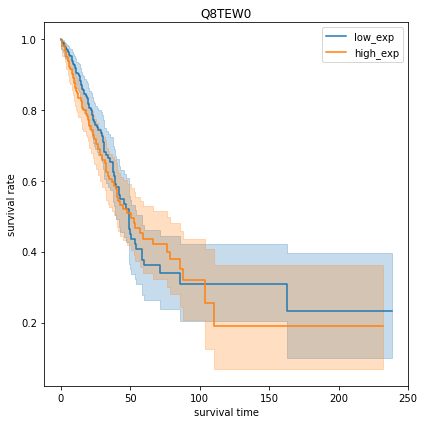

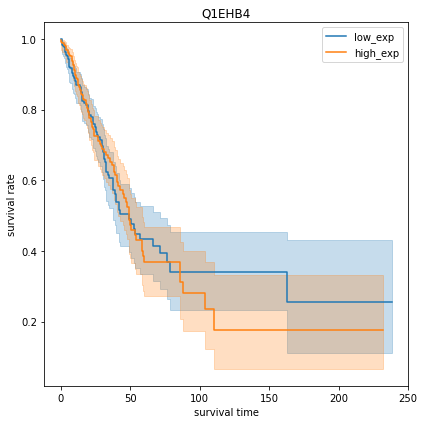

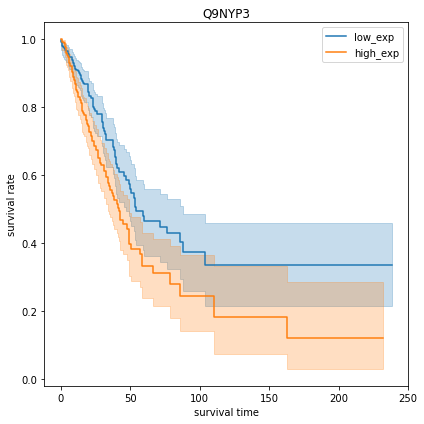

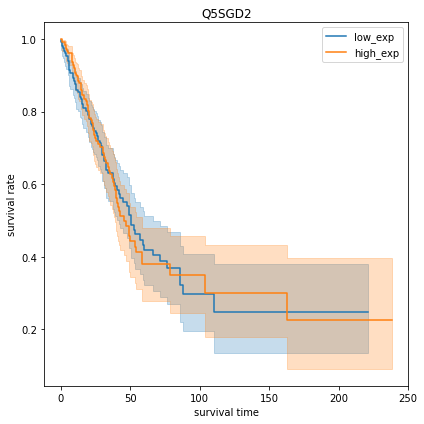

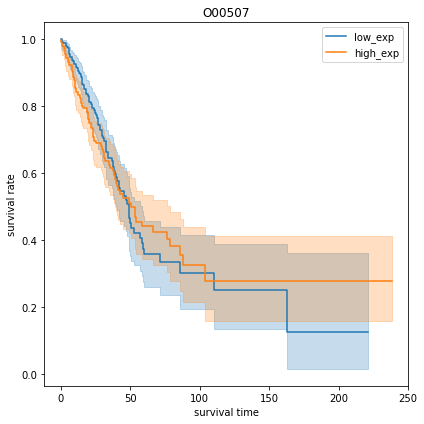

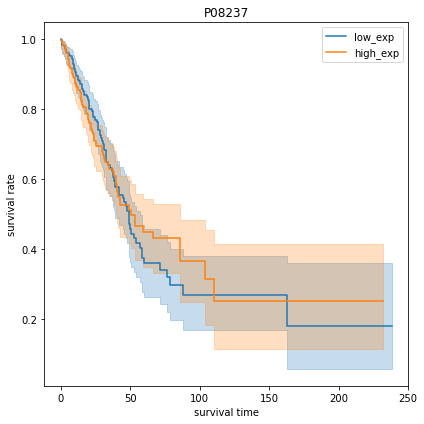

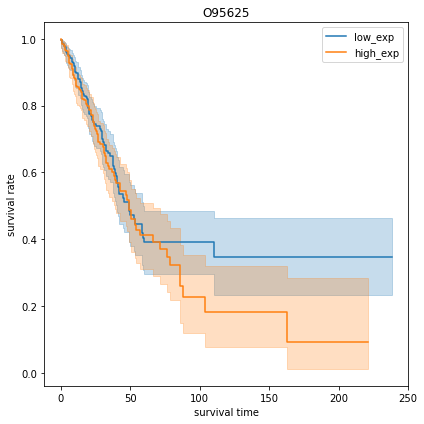

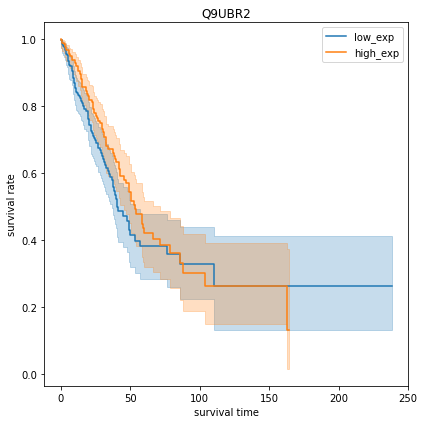

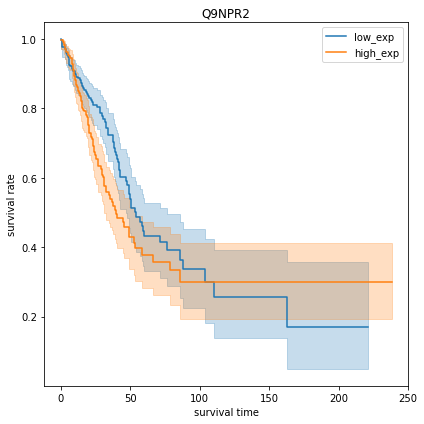

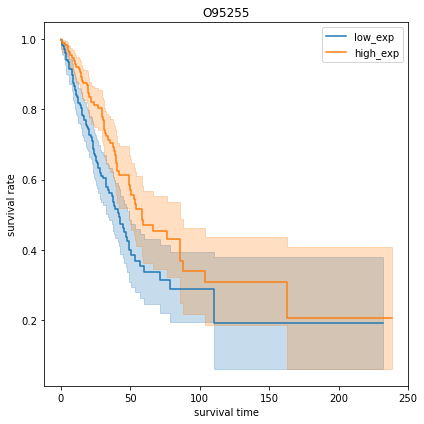

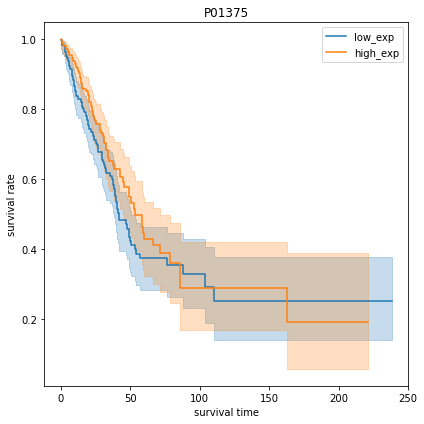

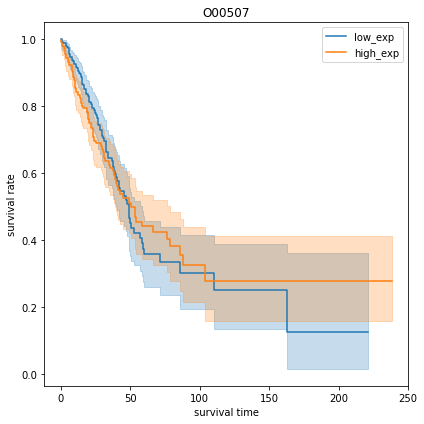

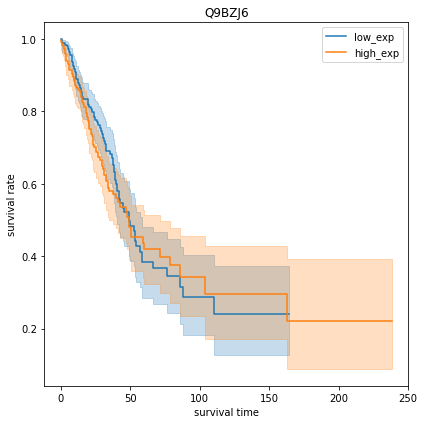

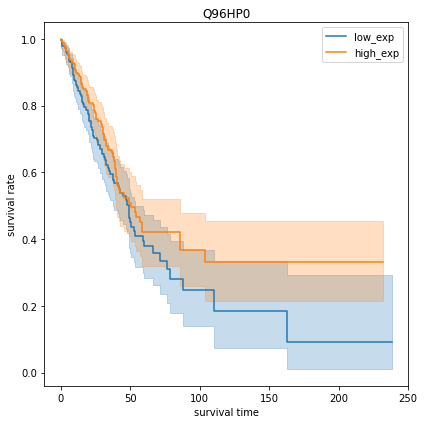

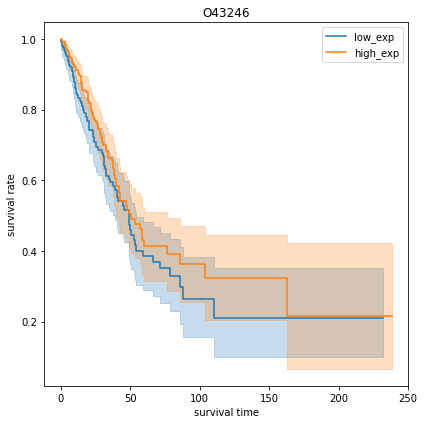

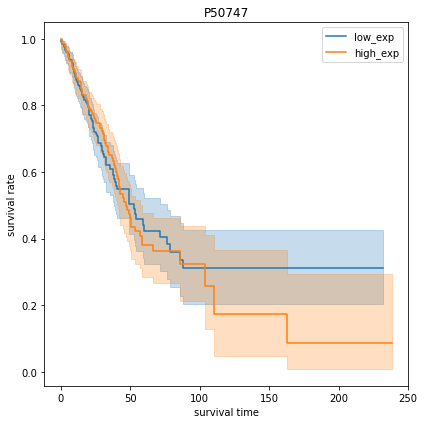

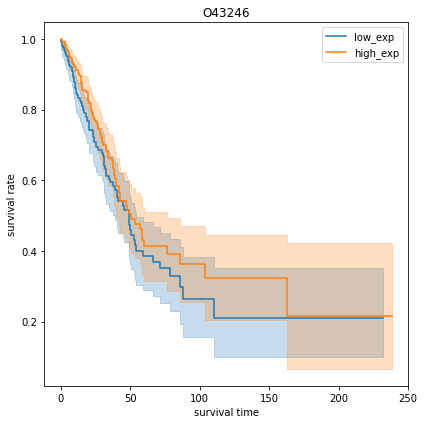

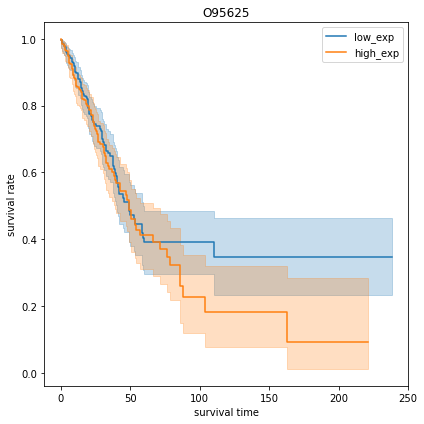

In [23]:
genelist = []; plist = []; medianlist = []; dirlist = []
for gene in list(genedata['uniprot']):
    cldata[gene] = cldata[gene].replace('NA',np.nan)
    median = np.nanmedian(cldata[gene])
    medianlist.append(median)
    if np.isnan(median): continue
    cldata[gene+'status'] = cldata[gene].apply(lambda x:find_group(x))
    df = pd.DataFrame(list(zip(cldata['OS_MONTHS'], cldata['status'],cldata[gene+'status'])), 
               columns =['survival','state','group']) 
    alldata = df[df['state']!='NA']
    alldata = alldata.dropna()
    lowdata = alldata[alldata['group']=='low']
    highdata = alldata[alldata['group']=='high']
    if len(highdata) == 0 or len(lowdata) == 0: continue
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111)
    kmf = ll.KaplanMeierFitter()
    kmf.fit(lowdata['survival'], event_observed=lowdata['state'],label='low_exp') 
    ax = kmf.plot()
    kmf.fit(highdata['survival'], event_observed=highdata['state'],label='high_exp') 
    ax = kmf.plot(ax=ax)
    #ax.set_xlim(0,4000)
    #ax.set_ylim(0.3,1)
    ax.set_ylabel('survival rate')
    ax.set_xlabel('survival time')
    ax.set_title(gene)
    plt.tight_layout()
    plt.savefig('expression_survival_flu_HLA_LUAD/KMplot_'+gene+'.png',dpi=600)
    results = ll.statistics.logrank_test(lowdata['survival'], highdata['survival'], lowdata['state'], highdata['state'], alpha=.99)
    pvalue = results.summary['p']
    chivalue = results.summary['test_statistic']
    genelist.append(gene)
    plist.append(pvalue)
    dirlist.append(np.median(highdata['survival'])-np.median(lowdata['survival']))
    #print(sum(chivalue),sum(pvalue),np.median(highdata['survival'])-np.median(lowdata['survival']))

In [24]:
plist = [sum(x) for x in plist]
ranksumdata = pd.DataFrame(list(zip(genelist,plist,dirlist)), 
               columns =['gene','rank sum test p-value','high expression survival-low expression survival']) 
ranksumdata.to_csv('expression_survival_flu_HLA_LUAD/KMplot_ranksum.tsv',sep='\t')

In [25]:
ranksumdata.sort_values(by='rank sum test p-value')

,gene,rank sum test p-value,high expression survival-low expression survival
63,Q8IZW8,0.000718,-1.693132
90,O95255,0.001788,-1.101358
15,O95255,0.001788,-1.101358
83,Q9NYP3,0.002316,-3.041063
58,Q9NYP3,0.002316,-3.041063
...,...,...,...
30,Q16798,0.994319,-2.284906
38,Q16798,0.994319,-2.284906
40,Q16798,0.994319,-2.284906
9,Q16798,0.994319,-2.284906


In [26]:
results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.88 0.35      1.52